Dimension Reduction: converting a large set of data with large number of dimensions to fewer dimensions ensuring that it conveys the information concisely

Four V's of big data: Volume, velocity, variety, veracity. DR focuses on Volume and Velocity

Colinearity: determines whether or not to drop variables

Missing Values: Potentially drop a variable altogether if there is too much missing data. Can impute values as well.

# Feature Selection and Dimension Reduction

* Beginners Guide To Dimension Reduction Techniques: https://www.analyticsvidhya.com/blog/2015/07/dimension-reduction-methods/
* Feature Selection For Machine Learning in Python: https://machinelearningmastery.com/feature-selection-machine-learning-python/
* The Ultimate Guide to 12 Dimensionality Reduction Techniques: https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
* PCA using Python (scikit-learn): https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


In [7]:
%matplotlib inline
import numpy as np              
import pandas as pd

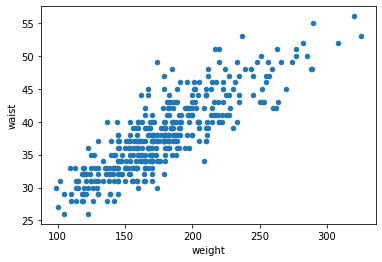

In [8]:
df = pd.read_csv("diabetes.csv")
df.plot.scatter(x='weight', y='waist')

In [ ]:
import seaborn as sns
sns.lmplot(x='weight',y='waist',data=df,fit_reg=True) 

## Missing Values

In [9]:
df = pd.read_csv("diabetes_missing_vals.csv")

# Let's look at how many missing values we have in our dataset
df.isnull().sum()

id                  0
chol                1
stab.glu            0
hdl                 1
ratio               1
glyhb              13
location            0
age                 0
gender              0
height              5
weight              1
frame              12
bp.1s             382
bp.1d             382
waist               2
hip                 2
wellness_score      0
dtype: int64

In [10]:
# Looking at the shape of our dataframe will allow us to see a total number of records
df.shape

(403, 17)

In [11]:
# Calculate the percentage of missing values
df.isnull().sum() / df.shape[0]

id                0.000000
chol              0.002481
stab.glu          0.000000
hdl               0.002481
ratio             0.002481
glyhb             0.032258
location          0.000000
age               0.000000
gender            0.000000
height            0.012407
weight            0.002481
frame             0.029777
bp.1s             0.947891
bp.1d             0.947891
waist             0.004963
hip               0.004963
wellness_score    0.000000
dtype: float64

With such a high amount of missing values in "bp.1s" and "bp.1d", we can consider dropping these predictors

## Low Variance
* A constant variable (all observations have same value)
* It cannot improve the power of model it has zero variance. 
* We should drop variables that have low variance compared to others because these variables will not explain the variation in response variables.


In [12]:
#df.std()
#consider as well

df.std()

id                11881.122124
chol                 44.445557
stab.glu             53.076655
hdl                  17.262626
ratio                 1.727886
glyhb                 2.242595
age                  16.312333
height                3.918515
weight               40.340666
bp.1s                30.962189
bp.1d                14.672780
waist                 5.729313
hip                   5.656713
wellness_score        0.000050
dtype: float64

In [15]:
# We see that there is barely any variance among wellness_scores across patients
df.var()

id                1.411611e+08
chol              1.975408e+03
stab.glu          2.817131e+03
hdl               2.979982e+02
ratio             2.985590e+00
glyhb             5.029232e+00
age               2.660922e+02
height            1.535476e+01
weight            1.627369e+03
bp.1s             9.586571e+02
bp.1d             2.152905e+02
waist             3.282502e+01
hip               3.199840e+01
wellness_score    2.483373e-09
dtype: float64

We could consider removing wellness score

In [13]:
df["gender"].value_counts()

female    401
male        2
Name: gender, dtype: int64

With "gender" having only 2 male points, then you can remove the 2 instances (rows) with males and move the "gender" variables

## Collinearity
* Variables (dimensions) with similar information or variation are called “Multicollinear”. 
* Dimensions exhibiting higher correlation can lower down the performance of model. 
* It is not good to have multiple variables of similar information or variation 



In [16]:
df = pd.read_csv("diabetes.csv")
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0


In [17]:
df.corr()

,id,chol,stab.glu,hdl,ratio,glyhb,height,weight,bp.1s,bp.1d,waist,hip
id,1.000000,0.059243,0.009315,0.059255,-0.034094,0.010378,-0.036948,-0.018658,0.013715,0.084001,-0.008123,0.048658
chol,0.059243,1.000000,0.150092,0.186581,0.475521,0.247099,-0.058858,0.066889,0.203344,0.171605,0.124489,0.079402
stab.glu,0.009315,0.150092,1.000000,-0.161899,0.280349,0.749236,0.090669,0.185453,0.166467,0.022014,0.218446,0.133502
hdl,0.059255,0.186581,-0.161899,1.000000,-0.686907,-0.149145,-0.101419,-0.290983,0.019804,0.065732,-0.268369,-0.210060
ratio,-0.034094,0.475521,0.280349,-0.686907,1.000000,0.328665,0.094335,0.281649,0.119386,0.048193,0.304162,0.194622
glyhb,0.010378,0.247099,0.749236,-0.149145,0.328665,1.000000,0.063023,0.171882,0.197936,0.032375,0.226184,0.141401
height,-0.036948,-0.058858,0.090669,-0.101419,0.094335,0.063023,1.000000,0.251251,-0.047827,0.038598,0.051094,-0.107832
weight,-0.018658,0.066889,0.185453,-0.290983,0.281649,0.171882,0.251251,1.000000,0.090873,0.175956,0.849855,0.829115
bp.1s,0.013715,0.203344,0.166467,0.019804,0.119386,0.197936,-0.047827,0.090873,1.000000,0.596557,0.196489,0.136655
bp.1d,0.084001,0.171605,0.022014,0.065732,0.048193,0.032375,0.038598,0.175956,0.596557,1.000000,0.167110,0.145805


In [19]:
df.corr().abs()

,id,chol,stab.glu,hdl,ratio,glyhb,height,weight,bp.1s,bp.1d,waist,hip
id,1.000000,0.059243,0.009315,0.059255,0.034094,0.010378,0.036948,0.018658,0.013715,0.084001,0.008123,0.048658
chol,0.059243,1.000000,0.150092,0.186581,0.475521,0.247099,0.058858,0.066889,0.203344,0.171605,0.124489,0.079402
stab.glu,0.009315,0.150092,1.000000,0.161899,0.280349,0.749236,0.090669,0.185453,0.166467,0.022014,0.218446,0.133502
hdl,0.059255,0.186581,0.161899,1.000000,0.686907,0.149145,0.101419,0.290983,0.019804,0.065732,0.268369,0.210060
ratio,0.034094,0.475521,0.280349,0.686907,1.000000,0.328665,0.094335,0.281649,0.119386,0.048193,0.304162,0.194622
glyhb,0.010378,0.247099,0.749236,0.149145,0.328665,1.000000,0.063023,0.171882,0.197936,0.032375,0.226184,0.141401
height,0.036948,0.058858,0.090669,0.101419,0.094335,0.063023,1.000000,0.251251,0.047827,0.038598,0.051094,0.107832
weight,0.018658,0.066889,0.185453,0.290983,0.281649,0.171882,0.251251,1.000000,0.090873,0.175956,0.849855,0.829115
bp.1s,0.013715,0.203344,0.166467,0.019804,0.119386,0.197936,0.047827,0.090873,1.000000,0.596557,0.196489,0.136655
bp.1d,0.084001,0.171605,0.022014,0.065732,0.048193,0.032375,0.038598,0.175956,0.596557,1.000000,0.167110,0.145805


In [18]:
#absolute value first, we don't care if positive or negative
#sort means the first few are all 1, self-correlantion
#very useful tool 
c = df.corr().abs()

#unstack makes it into a list and makes information easier to digest
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so

hip       hip         1.000000
waist     waist       1.000000
chol      chol        1.000000
stab.glu  stab.glu    1.000000
hdl       hdl         1.000000
                        ...   
id        glyhb       0.010378
stab.glu  id          0.009315
id        stab.glu    0.009315
waist     id          0.008123
id        waist       0.008123
Length: 144, dtype: float64

## Univariate Feature Selection
* Statistical tests can be used to select those features that have the strongest relationship with the output variable.
* The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
* The example below uses the chi squared (chi^2) statistical test for non-negative features to select k of the best features from the Pima Indians onset of diabetes dataset.

Chi^2 how often categorical variables occurs. Use modules to determine which variables to use.

- Uses a variables' frequencies to determine relationship between variables.
- Determines whether the distribution in one variable depends on the distribution of another variable

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df = pd.read_csv("pima_indians_diabetes.csv")
#Note this is not to be done in practice, dropna()
df.dropna(inplace=True)

X = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]]
Y = df['Outcome']
# feature extraction, select "4" which are most meaninful
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores, (pairwise)
np.set_printoptions(precision=3)
print(fit.scores_)


[ 111.52  1411.887   17.605   53.108 2175.565  127.669  181.304]


In [ ]:
#Insulin, 5th, would be best predictor, can consider eliminating others 
#(lower score = cannot reject null hypothesis)
#view the results in a dataframe
scored_predictors = pd.concat([pd.Series(X.columns),pd.Series(fit.scores_)], axis =1)
scored_predictors.columns = ["Features","Scores"]
scored_predictors

## Recursive Feature Selection / Elimination

###  Recursive Feature Selection: Linear Regression Example

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Load data
df = pd.read_csv("diabetes_missing_vals.csv")
df = df[["stab.glu", "hdl", "ratio", "glyhb", "age", "height", "weight", "hip", "chol"]]
df.dropna(inplace=True)

#Select Features/Response
X = df[["stab.glu", "hdl", "ratio", "glyhb", "age", "height", "weight", "hip"]]
Y = df["chol"]

#Instantiate the model
#Note the lack of Test/Train/Split
#Our goal is Feature Selection, not training a model 
model = LinearRegression()

rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
#Number of feature to select = 3
#Finding the smallest sum-squared-error (SSE)
print("Num Features:",  fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ",  fit.ranking_)


###  Recursive Feature Elimination: Logistic Regression Example

In [ ]:
#Very similar process
#Learn more about Linear vs. Logistic Regression in the references 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("diabetes_missing_vals.csv")


df = df[["stab.glu", "hdl", "ratio", "glyhb", "age", "height", "weight", "hip", "chol"]]
df.dropna(inplace=True)

X = df[["stab.glu", "hdl", "ratio", "glyhb", "age", "height", "weight"]]
Y = df["chol"]


model = LogisticRegression()


rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features:",  fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ",  fit.ranking_)

#Note the differences between suggested feature in Linear vs. Logistic Regression 

#### Outcome of feature elimination

We can see the outcome from our feature selection if we use the suggested features. Note that this would probably not be done in practice in this exact same way (more clearning, validation would follow) but you can see the (incremental) benefit of our feature selection from our Linear Regression above:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("diabetes_missing_vals.csv")
df = df[["stab.glu", "hdl", "ratio", "glyhb", "age", "height", "weight", "hip", "chol"]]
df.dropna(inplace=True)

#Calculate Score with all Variables
X_all = df[["stab.glu", "hdl", "ratio", "glyhb", "age", "height", "weight", "hip"]]
y_all = df["chol"]


X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=0.20, random_state = 1)
model = LinearRegression()
model.fit(X_all_train, y_all_train)

y_pred = model.predict(X_all_test)
print("The score for all variables is:",model.score(X_all_test, y_all_test))

#Caluculate SCore with selected/reduced variables based on info from RFE
X_reduc = df[[ "hdl", "ratio", "height"]]
y_reduc = df["chol"]


X_reduc_train, X_reduc_test, y_reduc_train, y_reduc_test = train_test_split(X_reduc, y_reduc, test_size=0.20, random_state = 1)
model = LinearRegression()
model.fit(X_reduc_train, y_reduc_train)

y_pred = model.predict(X_reduc_test)
print("The score for all variables is:",model.score(X_reduc_test, y_reduc_test))

## Random Forest

#### The Data

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

https://www.kaggle.com/uciml/pima-indians-diabetes-database/version/1#


In [ ]:
# read the data into a Pandas DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('pima_indians_diabetes.csv')
df.head()


#### Random Forest Regression

In [ ]:
# define X and y
X = df[['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

#looking to predict a glucose value
y = df['Glucose']

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# instantiate model
# max 10 decision points, any further = pruning 
model = RandomForestRegressor(random_state=1, max_depth=10)

# fit model
model.fit(X_train, y_train)

In [ ]:
# make estimations for the testing set
y_pred = model.predict(X_test)
y_pred

In [ ]:
#finding the ranking of features/variables
features = X.columns
print(features)
importances = model.feature_importances_
print(importances)
#higher the value, higher the importance
#consider dimensions with more importance

Some additional validation for review

In [ ]:
#note that low correlation can still be a good predictor 
df[['Insulin','Glucose']].corr()

In [ ]:
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Random Forest Classification


In [ ]:
# define X and y
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

#looking to predict a binary outcome of having diabetes
y = df['Outcome']

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
#Note the difference for what we import
#Change from "RF Regressor" to "RF Classifer"
from sklearn.ensemble import RandomForestClassifier

# instantiate model
model = RandomForestClassifier(random_state=1, max_depth=10)

# fit model
model.fit(X_train, y_train)

In [ ]:
# make estimations for the testing set
y_pred = model.predict(X_test)
y_pred

In [ ]:
#finding the ranking of features/variables
features = X.columns
print(features)
importances = model.feature_importances_
print(importances)
#higher the value, higher the importance, consider for more importance

In [ ]:
#Note the difference in Classification variables/features compared to our Regression ranking
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Factor Analysis
* Highly correlated features can be grouped by their correlations
* All variables in a particular group can be highly correlated among themselves but have low correlation with variables of other group(s). 
* Each group represents a single underlying construct or factor. 
* These factors are smaller in number as compared to large number of dimensions. 


In [ ]:
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes_missing_vals.csv")

X = df[["stab.glu", "hdl", "ratio", "glyhb", "age", "height", "weight", "hip"]]
X.dropna(inplace=True)

FA = FactorAnalysis(n_components = 3).fit_transform(X.values)

In [ ]:
# Convert factor components into a dataframe
fa_df = pd.DataFrame(data=FA, columns=['component1','component2','component3'])
fa_df.head()

In [ ]:
X.shape

In [ ]:
fa_df.shape

In [ ]:
df_concat = pd.concat([X, fa_df], axis=1)
df_concat.head()

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2],FA[:,0])

## Principal Component Analysis
* Features are transformed into a new set of features
* These new features are linear combination of original features. 
* These new sets of features are known as principal components. 
* They are obtained in such a way that first principle component accounts for most of the possible variation of original data
* Each succeeding component has the highest possible variance
* The second principal component must be orthogonal to the first principal component. In other words, it does its best to capture the variance in the data that is not captured by the first principal component. 



In [ ]:
from sklearn.decomposition import PCA

df = pd.read_csv("pima_indians_diabetes.csv")
df.dropna(inplace=True)

X = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]]
Y = df['Outcome']

# feature extraction
pca = PCA(n_components=2)
fit = pca.fit(X)
# summarize components
print("Explained Variance:", fit.explained_variance_ratio_)
print("Components: ")


In [ ]:
# Convert principal components into a dataframe
principalComponents = pca.fit_transform(X)
pca_df = pd.DataFrame(data=principalComponents, columns=['component1','component2'])
pca_df.head()


In [ ]:
print("Original dataframe shape: ")
print(df.shape)
print("PCA dataframe shape: ")
print(pca_df.shape)

In [ ]:
# Plot PCA results
# colors = ['r', 'g']
rng = np.random.RandomState(0)
colors = rng.rand(100)
pca_df.plot.scatter(x='component1', y='component2', c=colors)